In [1]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import math
import torch
import spinup
import multiprocessing as mp

from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from spinup.algos.pytorch.ddpg.core import MLPActorCritic

%matplotlib notebook

In [2]:
from src import *
from src.constants import DT, MAX_X, MAX_Y, BALL_ERROR_SCALING, BALL_D_ERROR_SCALING, BALL_INTEGRAL_ERROR_SCALING

In [3]:
train = True

In [4]:
with open('src/data/benchmark_trajectory.json') as json_file:
    benchmark_data = json.load(json_file)

In [5]:
t = np.array(benchmark_data['t'])
test_trajectory = np.array(benchmark_data['target'])
benchmark_trajectory = np.array(benchmark_data['trajectory'])
benchmark_angle = np.array(benchmark_data['angle'])
benchmark_u = np.array(benchmark_data['u'])

# Exploration

In [6]:
root = 'src/data/black_box_controller/genitic_net'

In [7]:
def train(reward_fn, reward_weight, nb_generation, population, num_parents_mating, parent_selection_type, 
          crossover_type, mutation_type, mutation_percent_genes, keep_parents, hidden_size, activation, name):
    if train:
        best_net = train_ball_controller_genetic(hidden_size, reward_fn, reward_weight, nb_generation,population, num_parents_mating, 
                              parent_selection_type, crossover_type,mutation_type, mutation_percent_genes, 
                              keep_parents)
        #torch.save(best_net, '{}/{}/model.pt'.format(root, name))
        
    #trained_ac = torch.load('{}/{}/model.pt'.format(root, name))
    evaluator_genetic = BBEnv()
    history_genetic, error_genetic, u_genetic, angle_genetic, loss_genetic = evaluator_genetic.simulate(best_net, test_trajectory)

    w = best_net.state_dict()

    saved_weights = {}
    for key, value in w.items():
        saved_weights[key] = value.detach().numpy().tolist()

    #with open('{}/{}/model.json'.format(root, name), 'w') as json_file:
        #json.dump(saved_weights, json_file, indent=1)
    
    print("MSE :", loss_genetic)

    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

    axs[0].plot(t, history_genetic[0, :], label='x_ddpg')
    axs[0].plot(t, test_trajectory[0, :], label='target')
    axs[0].set_ylabel('Ball position x [m]')
    axs[0].set_ylim([-MAX_X, MAX_X])
    axs[0].legend()

    axs[1].plot(t, history_genetic[1,:], label='y_ddpg')
    axs[1].plot(t, test_trajectory[1, :], label='target')
    axs[1].set_ylabel('Ball position y [m]')
    axs[1].set_ylim([-MAX_X, MAX_X])
    axs[1].legend()

    axs[2].plot(t, error_genetic[0, :], label='x')
    axs[2].plot(t, error_genetic[1, :], label='y')
    axs[2].set_ylabel('Ball error [m]')
    axs[2].set_ylim([-MAX_X, MAX_X])
    axs[2].legend()

    axs[3].plot(t, angle_genetic[0, :], label='angle_ddpg')
    axs[3].plot(t, u_genetic[0, :], label='u_ddpg')
    axs[3].set_ylabel('Motor x angle [deg]')
    axs[3].legend()

    axs[4].plot(t, angle_genetic[1, :], label='angle_ddpg')
    axs[4].plot(t, u_genetic[1, :], label='u_ddpg')
    axs[4].set_xlabel('Time [s]')
    axs[4].set_ylabel('Motor y angle [deg]')
    axs[4].legend()

    plt.show()

In [8]:
nb_generation = 20
population = 100
num_parents_mating = 20
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 20
keep_parents =20

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.03436068,  0.02281903], dtype=float32), array([0.00465193, 0.05061517], dtype=float32), array([-0.00253699,  0.00094543], dtype=float32))
[ 0.06201509 -0.00678322]


/home/benoit/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Generation = 1
Fitness    = 72.62110254024057
Generation = 2
Fitness    = 420.76005369074977
Generation = 3
Fitness    = 98.09964675251445
Generation = 4
Fitness    = 257.9514262914544
Generation = 5
Fitness    = 420.76005369074977
Generation = 6
Fitness    = 98.09964675251445
Generation = 7
Fitness    = 420.76005369074977
Generation = 8
Fitness    = 98.09964675251445
Generation = 9
Fitness    = 420.76005369074977
Generation = 10
Fitness    = 185.928832516911
Generation = 11
Fitness    = 420.6915700339485
Generation = 12
Fitness    = 172.61769858255494
Generation = 13
Fitness    = 412.1234986433019
Generation = 14
Fitness    = 172.61769858255494
Generation = 15
Fitness    = 420.6915700339485
Generation = 16
Fitness    = 94.22384076587423
Generation = 17
Fitness    = 143.2946535523801
Generation = 18
Fitness    = 94.22384076587423
Generation = 19
Fitness    = 420.6915700339485
Generation = 20
Fitness    = 419.4981985524222


<IPython.core.display.Javascript object>


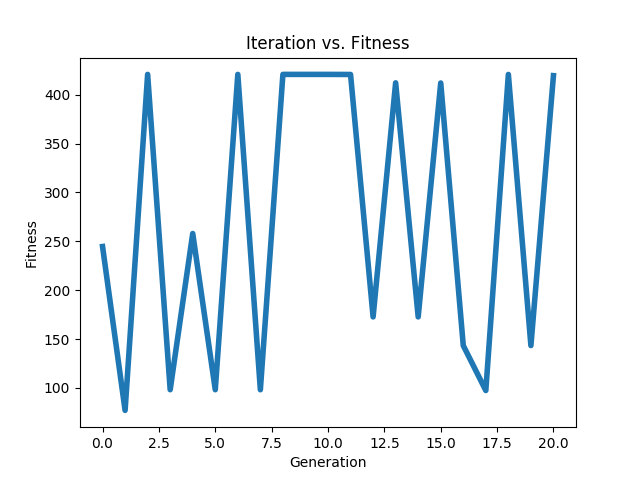

Fitness value of the best solution = 419.4981985524222
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.01284656, -0.03884234], dtype=float32), array([ 0.0113884 , -0.04289184], dtype=float32), array([ 0.00044282, -0.00146562], dtype=float32))
MSE : -52329288278.06935


<IPython.core.display.Javascript object>


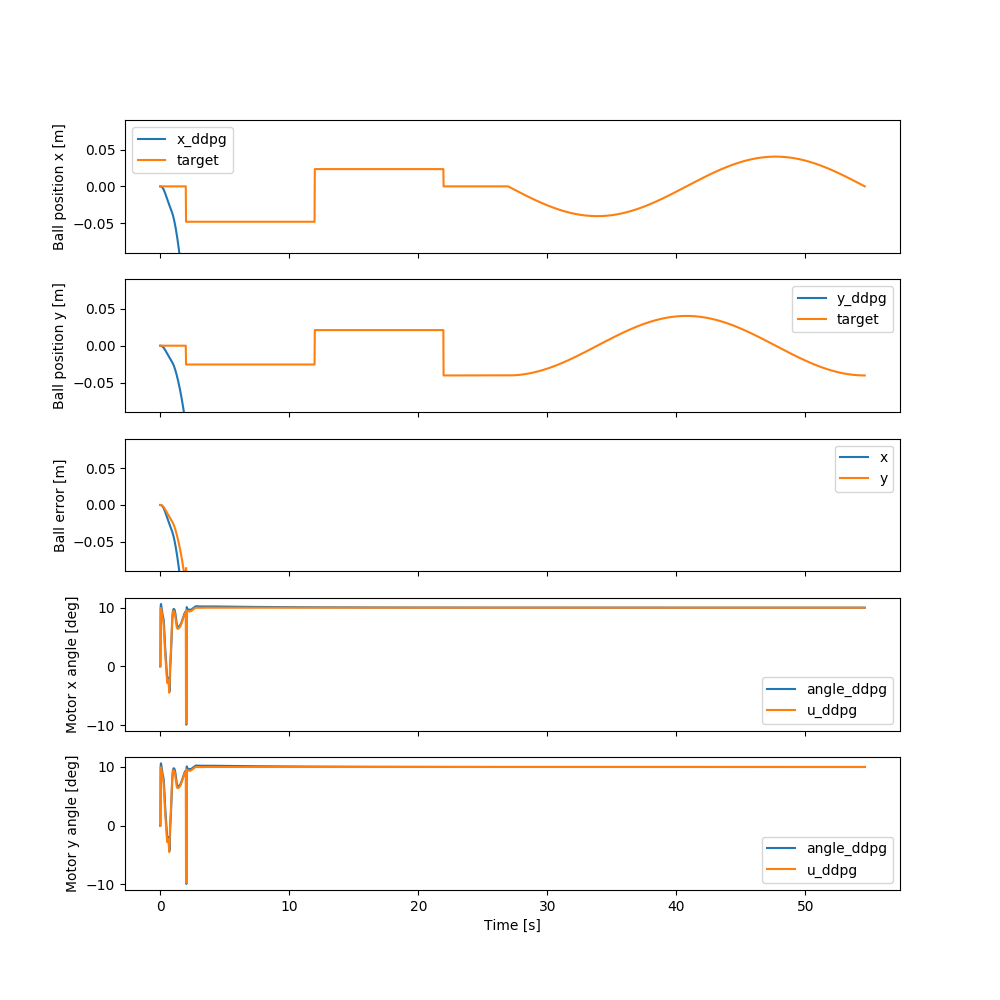

In [9]:
reward_fn = quadratic_e_reward_penality
reward_weight = 0.3
hidden_size = 100
activation = torch.nn.ReLU
name='pep_0.6_[100]_relu'
train(reward_fn, reward_weight, nb_generation, population, num_parents_mating, parent_selection_type, 
          crossover_type, mutation_type, mutation_percent_genes, keep_parents, hidden_size, activation, name)

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.04126814, 0.03134353], dtype=float32), array([0.04329074, 0.0260396 ], dtype=float32), array([ 0.00299148, -0.00284393], dtype=float32))
[-0.01191862 -0.03995769]
Generation = 1
Fitness    = -96.64283649494233
Generation = 2
Fitness    = -100.94932264973083
Generation = 3
F

<IPython.core.display.Javascript object>


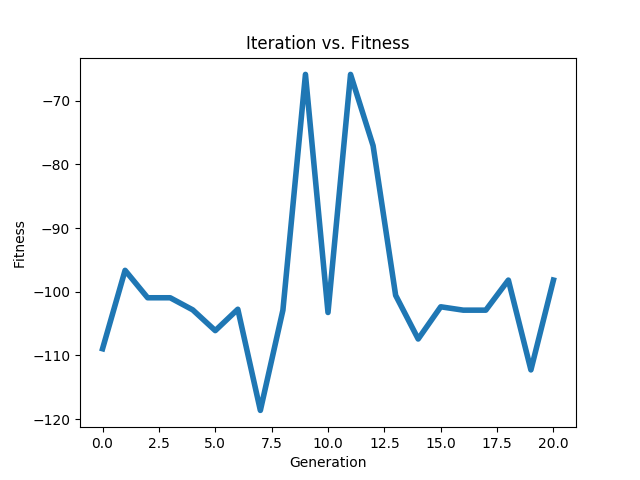

Fitness value of the best solution = -98.17246587483054
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([ 0.0618924 , -0.03193158], dtype=float32), array([-0.0539435 , -0.06539396], dtype=float32), array([ 0.00198519, -0.00015032], dtype=float32))
MSE : -48426707.36223261


<IPython.core.display.Javascript object>


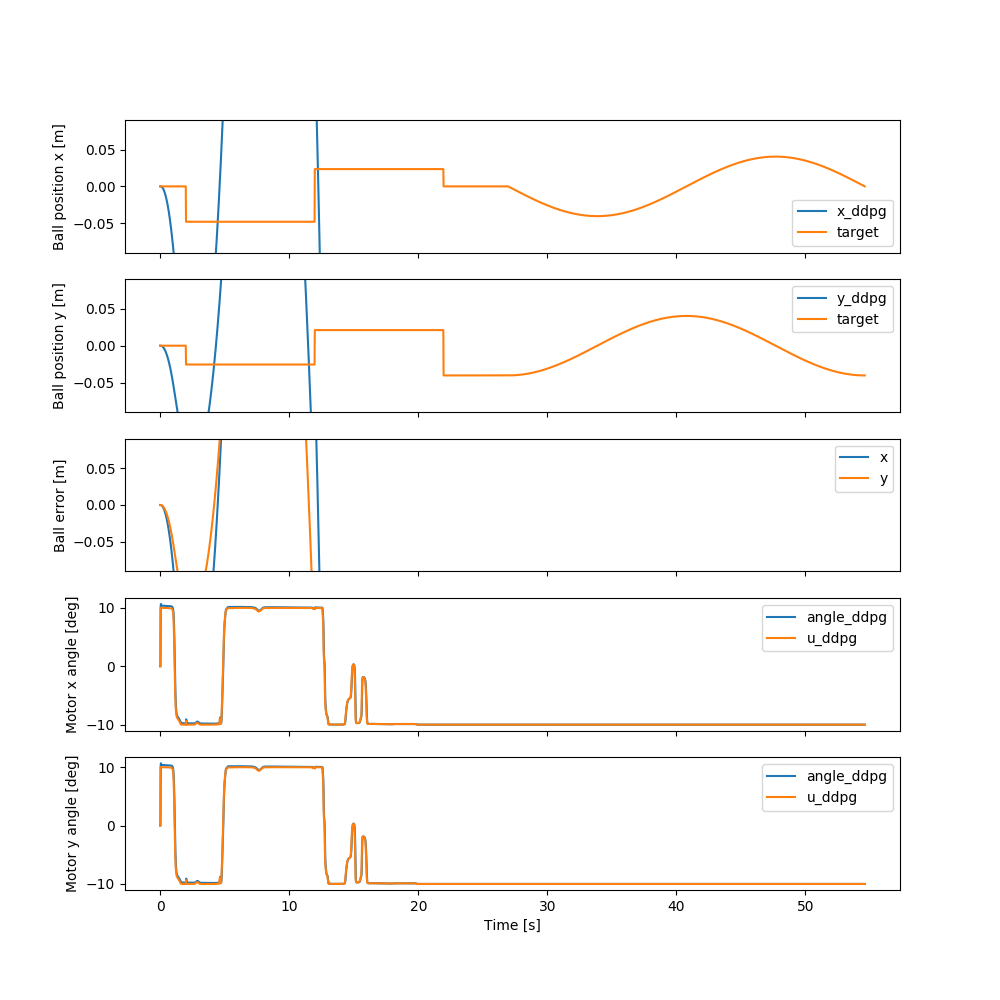

In [10]:
reward_fn = linear_e_reward_penality
reward_weight = 0.3
hidden_size = 100
activation = torch.nn.ReLU
name='lep_0.3_[100]_relu'
train(reward_fn, reward_weight, nb_generation, population, num_parents_mating, parent_selection_type, 
          crossover_type, mutation_type, mutation_percent_genes, keep_parents, hidden_size, activation, name)

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.03770798, 0.05470325], dtype=float32), array([-0.0610075 ,  0.02648935], dtype=float32), array([-0.00089414,  0.00094946], dtype=float32))
[-0.05227715 -0.01088047]
Generation = 1
Fitness    = -31.79202946090803
Generation = 2
Fitness    = -33.54556229531976
Generation = 3


<IPython.core.display.Javascript object>


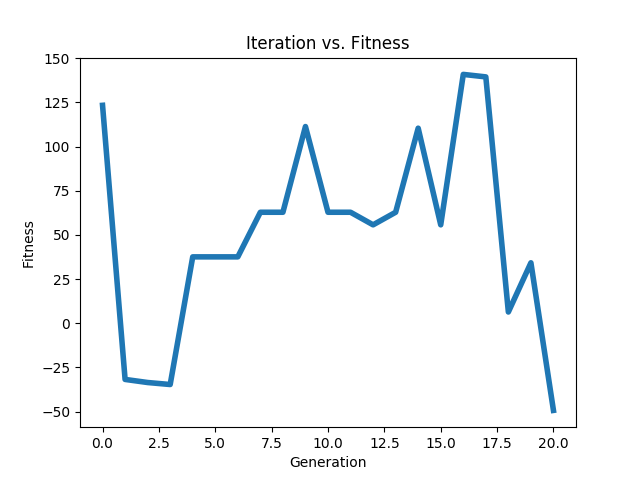

Fitness value of the best solution = 34.223996743577295
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.042032 , -0.0453001], dtype=float32), array([-0.01583283,  0.02011639], dtype=float32), array([0.00180235, 0.00162029], dtype=float32))
MSE : -9471003738.686817


<IPython.core.display.Javascript object>


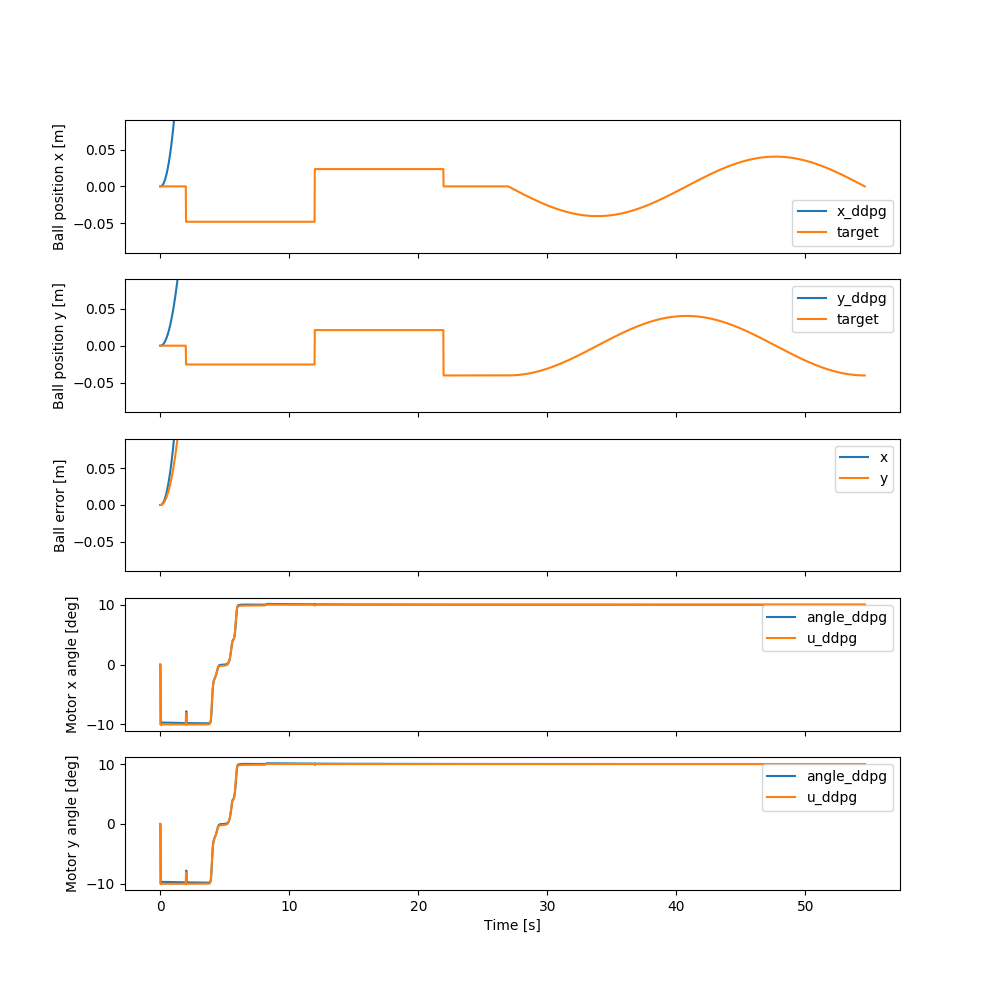

In [11]:
reward_fn = linear_de_penality_reward
reward_weight = 0.3
hidden_size = 100
activation = torch.nn.ReLU
name='dep_0.3_[100]_relu'
train(reward_fn, reward_weight, nb_generation, population, num_parents_mating, parent_selection_type, 
          crossover_type, mutation_type, mutation_percent_genes, keep_parents, hidden_size, activation, name)